# 1. Data Preparation

In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)

In [2]:
print(mnist.keys())
dict_keys = mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])


In [3]:
mnist['data']

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
mnist['target']

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [5]:
import numpy as np
import pandas as pd


print((np.array(mnist.data.iloc[0]).reshape(28, 28) > 0).astype(int))
# this number is indeed  mambo 'number five'

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0]
 [0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 

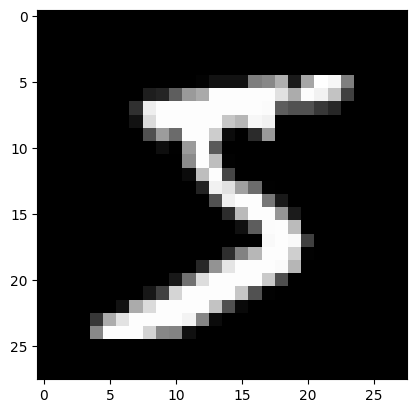

In [6]:
from matplotlib import pyplot as plt
pixels = np.array(mnist.data.loc[0]).reshape(28, 28)
plt.imshow(pixels, cmap='gray')
plt.show()


# 2. Train and test set

## Manual devide without shuffle to see why the shuffle is necessary

In [7]:
X = mnist['data'] # dataFrame already
y = mnist['target'] # by default Series (1D dataFrame)
y = y.sort_values()

In [8]:
type(X)

pandas.core.frame.DataFrame

In [9]:
X.describe()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,...,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.0,70000.0,70000.0,70000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.197414,0.099543,0.046629,0.016614,0.012957,0.001714,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.991206,4.256304,2.783732,1.561822,1.553796,0.320889,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.000000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [10]:
X = X.reindex(list(y.index))
X # X sorted by index order in y (y was sorted by it label from numbers representing '0' to '9')

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
34999,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
56424,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
56419,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16705,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
56415,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13687,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
42651,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
58914,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13678,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
X_train, X_test = X[:56000], X[56000:]
y_train, y_test = y[:56000], y[56000:]
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


(56000, 784) (56000,)
(14000, 784) (14000,)


In [12]:
print(y_train.unique())
print(y_test.unique())


['0', '1', '2', '3', '4', '5', '6', '7']
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']
['7', '8', '9']
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']


**we can see that now there is no data that depicts number 8 or 9 in the training sample, so our model doesnt have data to learn how to recognise these two numbers.**

## Devide with shuffle by train_test_split method

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, shuffle = True) # no random_state=42
# we save the shuffled X and y in the same variable (so if you want to use sorted ones again, point to the code above)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(56000, 784) (56000,)
(14000, 784) (14000,)


In [14]:
print(y_train.unique())
print(y_test.unique())

['4', '5', '9', '1', '6', '3', '7', '2', '8', '0']
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']
['8', '6', '3', '2', '0', '1', '5', '7', '4', '9']
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']


**now we have data representing all numbers from 0 to 9 in train set sample, so model can learn how to recognise all types of numbers**

# 3. Model learning, one class

In [15]:
y_train_zero = (y_train.astype(int) == 0) # we create an array which points at numbers classified as 'zeros'.
y_test_zero = (y_test.astype(int) == 0) # we create an array which points at numbers classified as 'zeros'.

## Teaching a Stochastic Gradient Descent classifier to detect the digit 0.

In [16]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier() # 42?
sgd_clf.fit(X_train, y_train_zero)


SGDClassifier()

In [17]:
import pickle

y_train_pred = sgd_clf.predict(X_train)
y_test_pred = sgd_clf.predict(X_test)
acc_train = sum(y_train_pred == y_train_zero)/len(y_train_zero)
acc_test = sum(y_test_pred == y_test_zero)/len(y_test_zero)

accuracy_zero = np.array([acc_train, acc_test])  # saving to ndarray (2, size) numpy. (pd.Dataframe(accuracy_zero) made it (2,1) size, but we wanted (2,).
with open("sgd_acc.pkl", "wb") as f:
    pickle.dump(accuracy_zero, f) 

In [18]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_train_zero, y_train_pred))

[[49119  1312]
 [   46  5523]]


In [19]:
print(confusion_matrix(y_test_zero, y_test_pred))

[[12320   346]
 [   13  1321]]


In [20]:
from sklearn.model_selection import cross_val_score
import pickle

accuracy_zero_kfold = cross_val_score(sgd_clf, X_train, y_train_zero,cv=3, scoring="accuracy",n_jobs=-1)
accuracy_zero_kfold = np.array(accuracy_zero_kfold)

# numpy object doesnt have the .to_pickle() method, so i decided to use the method below
with open("sgd_cva.pkl", "wb") as f:
    pickle.dump(accuracy_zero_kfold, f)


**W ecalculated 3-point cross validation for our training model.**

In [21]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
y_train_pred = cross_val_predict(sgd_clf, X_train ,y_train_zero, cv=3,n_jobs=-1)
print(confusion_matrix(y_train_zero, y_train_pred))

[[49899   532]
 [  284  5285]]


**And confusion matrix as well**

In [22]:
from sklearn.metrics import precision_score, recall_score, f1_score

print(precision_score(y_train_zero, y_train_pred)) #precision
print(recall_score(y_train_zero, y_train_pred)) #recall
print(f1_score(y_train_zero, y_train_pred)) #f1

0.9085439229843562
0.9490034117435805
0.9283330405761462


## Teaching a Stochastic Gradient Descent classifier to detect all types of digits from 0 to 9.

In [23]:
sgd_m_clf = SGDClassifier(n_jobs=-1) # no random_state=42
sgd_m_clf.fit(X_train, y_train.astype(int))




SGDClassifier(n_jobs=-1)

In [24]:
print(sgd_m_clf.predict([mnist["data"].iloc[0], mnist["data"].iloc[1]]))


[5 0]


/home/ppaczek04/miniconda3/envs/um_env/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


In [25]:
print(cross_val_score(sgd_m_clf, X_train, y_train,cv=3, scoring="accuracy", n_jobs=-1))
y_train_pred = cross_val_predict(sgd_m_clf, X_train, y_train, cv=3, n_jobs=-1)
conf_mx = confusion_matrix(y_train, y_train_pred)
print(conf_mx)
conf_mx = np.array(conf_mx)
with open("sgd_cmx.pkl", "wb") as f:
    pickle.dump(conf_mx, f)

[0.88053785 0.87325226 0.76883103]
[[5329    1   23   35   21   26   18    5   99   12]
 [   1 5982   60   30    5   17    5    7  236   14]
 [  49   52 4752  130   73   25   40   77  359   13]
 [  36   17  151 4707   26  122   10   58  567   48]
 [  10   20   33   11 5003   11   31   24  168  140]
 [  77   19   42  338   97 3521   48   25  822   70]
 [  57   12   92   19   72  115 4927    4  170    2]
 [  26   19   90   49   97   11    2 5221  102  211]
 [  43   58   64  180   81  122   12   27 4753   43]
 [  25   23   22  105  556   49    0  330  293 4168]]
